In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate
from sklearn import metrics
import seaborn as sns 
import pickle



%matplotlib inline

In [13]:
#read in final dataset
file = '..\Data\Final_Data.csv'
df = pd.read_csv(file, index_col=8)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Code
EmployeeCount,,,,,,,,,,,,,,,,,,,,,
1,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,Y,11,8,0,1.0,6,1,0,0,1
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,...,Y,23,8,1,6.0,3,5,1,4,1
1,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,...,Y,15,8,3,5.0,2,5,0,3,0
1,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,...,Y,11,8,3,13.0,5,8,7,5,0
1,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,Y,12,8,2,9.0,2,6,0,4,0


In [35]:
#create logistic regression, input GDP, output is_top20
X = df[['MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'YearsSinceLastPromotion', 'JobLevel']]
y = df.Gender_Code
crossval = log_reg(X, y, 10)
crossval

{'fit_time': array([0.01946855, 0.01597095, 0.0119133 , 0.00699306, 0.00692534,
        0.00597978, 0.00598025, 0.00797296, 0.00697613, 0.00597978]),
 'score_time': array([0.00498152, 0.00376582, 0.0019958 , 0.00098324, 0.00099802,
        0.00199342, 0.00199413, 0.00199342, 0.00099683, 0.00267029]),
 'estimator': (LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none')),
 'test_score': array([0.59908884, 0.59908884, 0.59817352, 0.59817352, 0.59817352,
        0.59817352, 0.60045662, 0.60045662, 0.60045662, 0.60045662]),
 'train_score': array([0.59928988, 0.59928988, 0.59939148, 0.59939148, 0.59939148,
        0.59939148, 0.59913793, 0.59913793, 0.59913793, 0.59913793])}

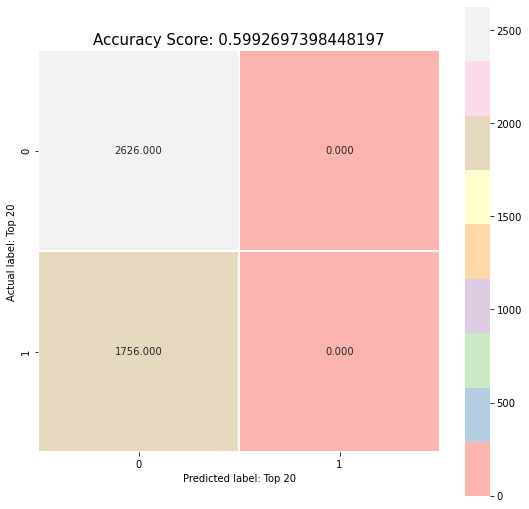

In [37]:
#chose model in array slot 0, since it appeared to have one of the highest scores
#display predictions vs actuals
estimator = crossval['estimator'][9]
accuracy_display(estimator, X, y, 'Top 20')